# Final Project CS209b
## EDA Flu data: clustering -- April 13
### Benjamin Levy, Will Fried, Dimitris Vamvourellis & Matthieu Meeus

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# open all csv files and save them in one dataframe
data = pd.DataFrame()
directory = 'flu_ground_truth'
for filename in os.listdir(directory):
    if data.empty:
        state = filename[13:-4]
        data = pd.read_csv(directory + '/' + filename)
        data.rename(columns={"wili": state}, inplace = True)
    else:
        state = filename[13:-4]
        state_data = pd.read_csv(directory + '/' + filename)
        data[state] = state_data['wili']  

In [3]:
data

,time,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2010-40,2.134770,0.875146,0.674721,0.696056,1.954120,0.660684,0.078309,0.100125,2.80877,...,0.274655,2.06514,0.747696,1.476410,0.0001,1.143430,0.510041,1.597410,0.465022,0.632911
1,2010-41,2.059990,1.128270,0.749939,0.674157,2.152660,0.628621,0.238095,0.368550,2.89079,...,0.499492,2.09394,0.410939,1.357770,0.0001,1.236530,1.040070,1.589680,0.581832,0.440621
2,2010-42,1.942240,0.586042,0.953365,0.514217,2.241730,0.804020,0.374158,0.337025,2.41042,...,0.499550,2.10072,0.440583,1.482210,0.0001,1.225450,0.904393,1.526720,1.188220,0.441798
3,2010-43,2.276500,0.967742,0.888804,0.413650,1.917480,0.909658,0.333542,0.460494,3.11632,...,0.401638,2.20655,0.755957,1.443930,0.0001,1.269020,0.955110,1.811710,1.010490,0.490305
4,2010-44,2.833710,0.683851,1.185730,1.090280,2.523260,0.971705,0.396743,0.222332,2.99118,...,0.528096,2.36381,0.651859,1.252760,0.0001,1.265470,0.786370,1.839860,1.096490,0.566636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,2019-27,0.684589,1.601260,0.827794,0.615385,1.082530,1.043860,0.000100,0.000100,3.95861,...,0.354925,1.82690,1.585350,1.271190,NaN,0.927170,0.539926,0.493546,0.872846,0.280899
457,2019-28,0.719655,1.430220,1.129820,0.288184,1.018560,0.959798,0.000100,0.000100,4.21128,...,0.492126,1.65596,1.197440,1.052630,NaN,0.900846,0.353838,0.259488,0.704191,0.166021
458,2019-29,0.790052,1.248130,0.860512,0.727069,1.029430,0.999950,0.000100,0.000100,4.04040,...,0.412116,1.49702,1.313940,0.896861,NaN,0.870202,0.265041,0.443590,0.830233,0.000100
459,2019-30,0.800068,0.000100,0.439354,0.714286,1.027130,0.921444,0.000100,0.000100,3.19149,...,0.526205,1.79673,1.344060,2.392340,NaN,0.800792,0.363840,0.181269,0.642082,0.000100


Text(0.5, 1.0, 'Flu infection rate over time since week 40 of 2010')

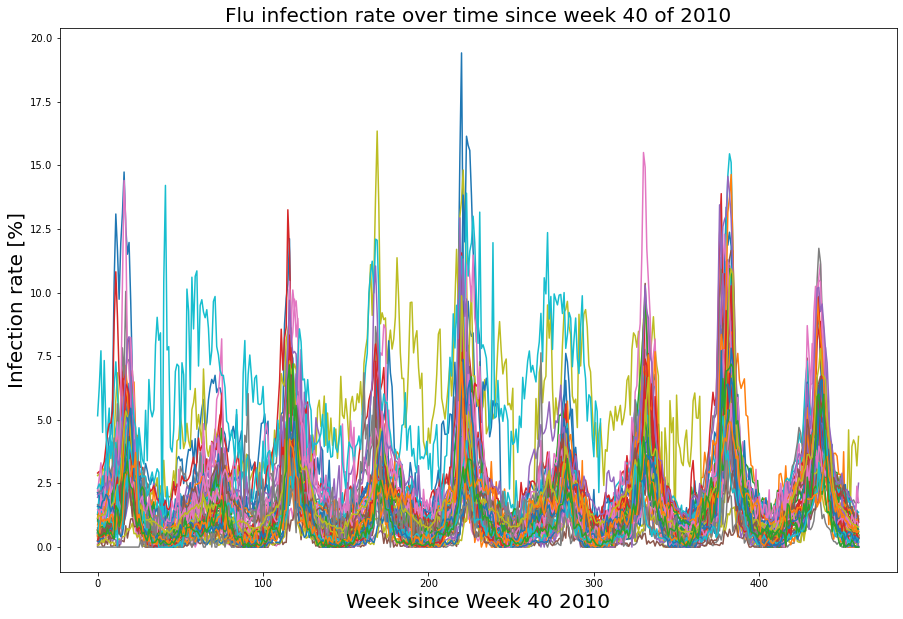

In [4]:
plt.figure(figsize = (15,10))
for state_name in data.columns:
    if state_name != 'time':
        plt.plot(range(len(data)), data[state_name])
plt.xlabel('Week since Week 40 2010', fontsize = 20)
plt.ylabel('Infection rate [%]', fontsize = 20)
plt.title('Flu infection rate over time since week 40 of 2010', fontsize = 20)

### 1. Let's try some PCA

In [5]:
# check the NaN
nans = []
for state_name in data.columns:
    if state_name != 'time':
        nans_state = data[state_name].isna().sum()
        if nans_state != 0:
            print('For {}, there are {} NaNs'.format(state_name, nans_state))
        nans.append(nans_state)

For Puerto Rico, there are 156 NaNs
For Virgin Islands, there are 52 NaNs


In [6]:
# we will now fill in these Nans with 0
data.fillna(0, inplace = True)

In [7]:
# get the value without the time
X = data.values[:,1:]
X

array([[2.13477, 0.8751459999999999, 0.674721, ..., 1.59741,
        0.46502200000000005, 0.632911],
       [2.05999, 1.12827, 0.749939, ..., 1.58968, 0.581832, 0.440621],
       [1.9422400000000002, 0.586042, 0.953365, ..., 1.52672, 1.18822,
        0.44179799999999997],
       ...,
       [0.7900520000000001, 1.24813, 0.860512, ..., 0.44359, 0.830233,
        0.0001],
       [0.800068, 0.0001, 0.439354, ..., 0.181269, 0.6420819999999999,
        0.0001],
       [0.703064, 0.0001, 0.451838, ..., 0.331858, 0.607029, 0.0001]],
      dtype=object)

In [8]:
# get the value without the time
# note that the matrix is transposed, as we want to 
# perform PCA/clustering with respect to the columns (states)
X = data.values[:,1:].T
pca_object = PCA(n_components = 2)
pca_object.fit(X)
X_pca = pca_object.transform(X)

In [9]:
data.columns[1:]

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York City',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object')

Text(0.5, 1.0, 'Entire dataset in its two first principle components')

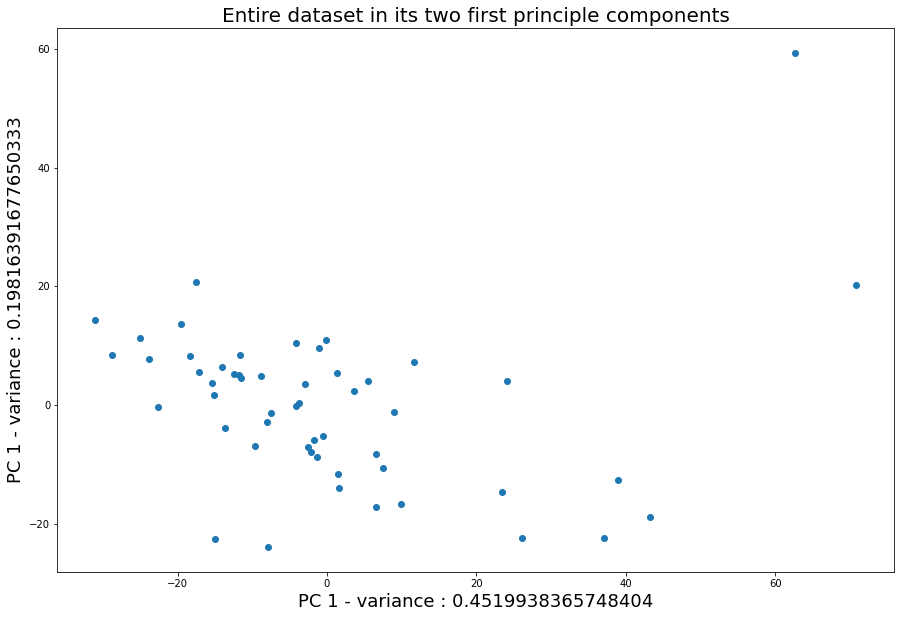

In [10]:
plt.figure(figsize = (15,10))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC 1 - variance : {}'.format(pca_object.explained_variance_ratio_[0]), fontsize=18)
plt.ylabel('PC 1 - variance : {}'.format(pca_object.explained_variance_ratio_[1]), fontsize=18)
plt.title('Entire dataset in its two first principle components',fontsize=20)

## 2. Let's try some KMeans clustering

In [11]:
kmeans_obj = KMeans(n_clusters=5, init='random', n_init=5, random_state=109)
kmeans_obj.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=5, n_jobs=None, precompute_distances='auto', random_state=109,
       tol=0.0001, verbose=0)

In [12]:
kmeans_obj.labels_.shape

(53,)

Text(0.5, 1.0, 'PCA plot of KMeans with k = 5')

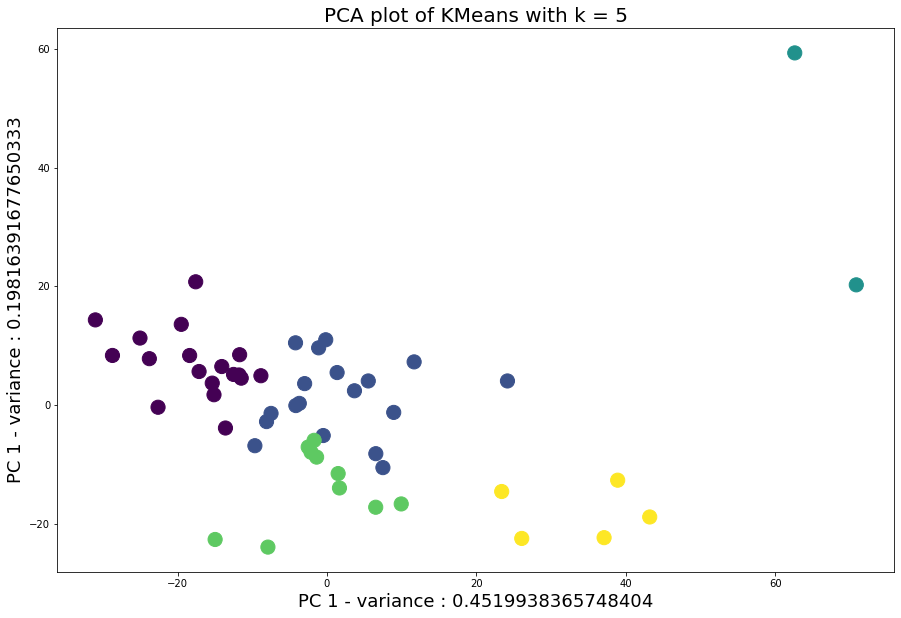

In [13]:
plt.figure(figsize = (15,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c = kmeans_obj.labels_, s = 200)
plt.xlabel('PC 1 - variance : {}'.format(pca_object.explained_variance_ratio_[0]), fontsize=18)
plt.ylabel('PC 1 - variance : {}'.format(pca_object.explained_variance_ratio_[1]), fontsize=18)
plt.title('PCA plot of KMeans with k = 5',fontsize=20)

Text(0.5, 1.0, 'Flu infection rate over time since week 40 of 2010')

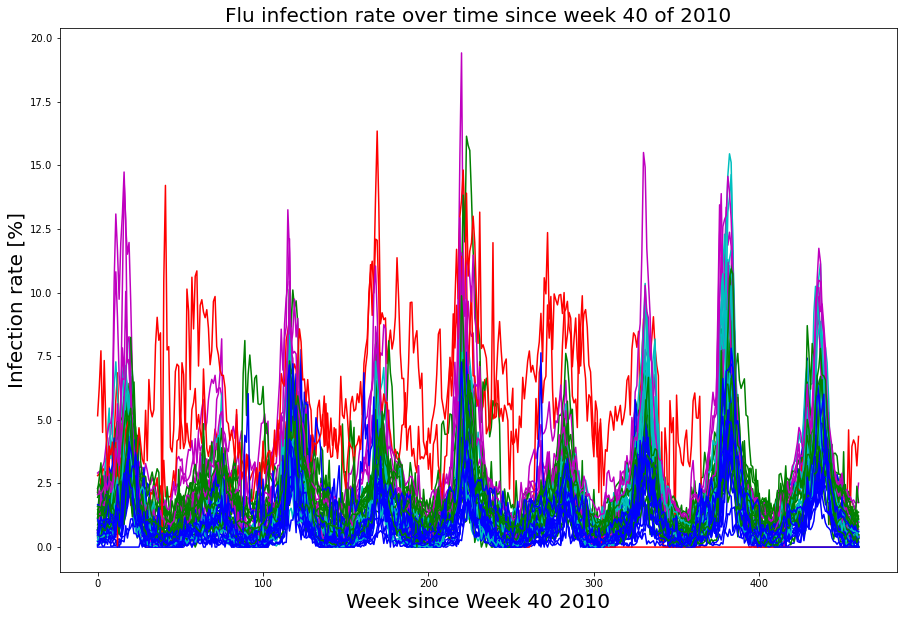

In [14]:
colors = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize = (15,10))
for i, state_name in enumerate(data.columns[1:]):
    cluster = kmeans_obj.labels_[i]
    plt.plot(range(len(data)), data[state_name], color = colors[cluster], label = cluster)
plt.xlabel('Week since Week 40 2010', fontsize = 20)
plt.ylabel('Infection rate [%]', fontsize = 20)
plt.title('Flu infection rate over time since week 40 of 2010', fontsize = 20)

In [15]:
# let's make a df of each cluster and their state names
cluster_df = pd.DataFrame()
cluster_df['State Name'] = data.columns[1:]
cluster_df['Cluster'] = kmeans_obj.labels_
for i in cluster_df.groupby('Cluster'):
    print(i)

(0,         State Name  Cluster
5         Colorado        0
7         Delaware        0
14            Iowa        0
18           Maine        0
20   Massachusetts        0
21        Michigan        0
25         Montana        0
27          Nevada        0
28   New Hampshire        0
34    North Dakota        0
35            Ohio        0
37          Oregon        0
40    Rhode Island        0
42    South Dakota        0
47  Virgin Islands        0
49      Washington        0
51       Wisconsin        0
52         Wyoming        0)
(1,        State Name  Cluster
1          Alaska        1
2         Arizona        1
4      California        1
6     Connecticut        1
10         Hawaii        1
11          Idaho        1
12       Illinois        1
19       Maryland        1
22      Minnesota        1
26       Nebraska        1
29     New Jersey        1
30     New Mexico        1
31  New York City        1
38   Pennsylvania        1
45           Utah        1
46        Vermont        1
